In [ ]:
# The jupyter script is used to carry out the analysis of the single run
# this is an ETL process: extract (from database), transform (preprocessing techniques), load (numPy arrays)
# from the music therapy study using a 12 seconds sliding window
# dataset is resampled due to undersampling during the recording
# ICA, notch and bandpass filtering are implmeneted to mitigate eeg noise
# results: spectogram and average bandpower comparison betwen timepoints per channel per brainwave

In [2]:
from helper import*
import params as cfg

In [3]:
# group-task-time
M = [['m11_1.zip'],['m12_1.zip']]
localDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/"
destDir = "/Users/joshuaighalo/Downloads/Mind_Monitor/dest/"
os.system('rm -rf %s/*' % destDir)
fs_setting = 'constant'

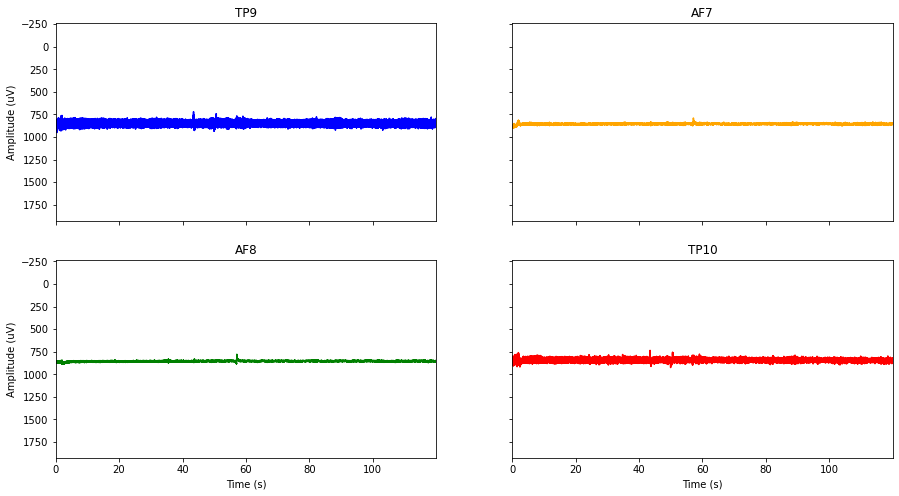

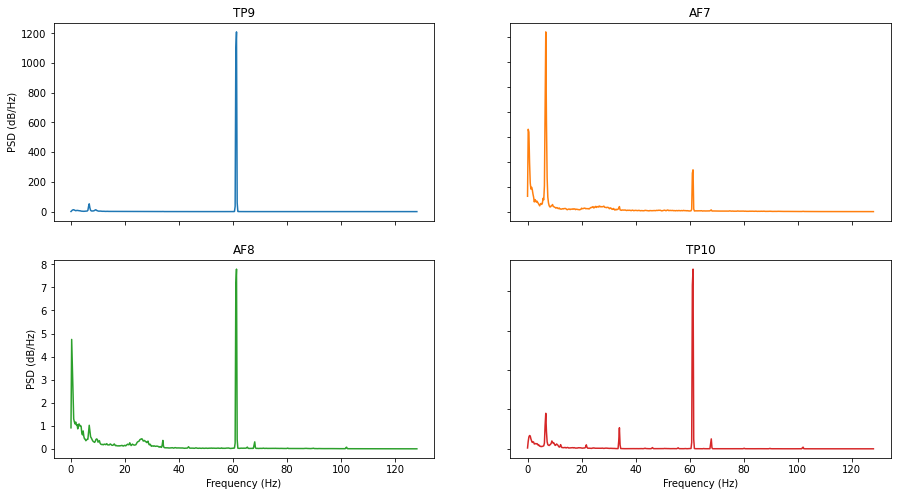

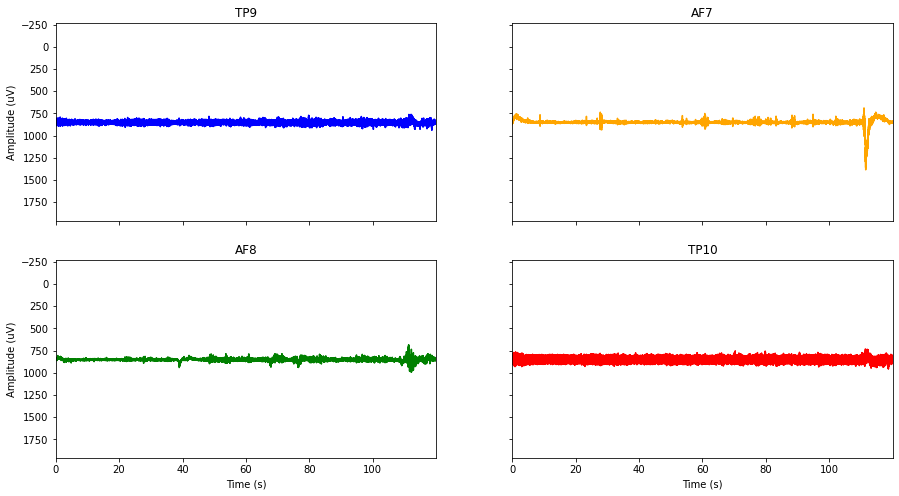

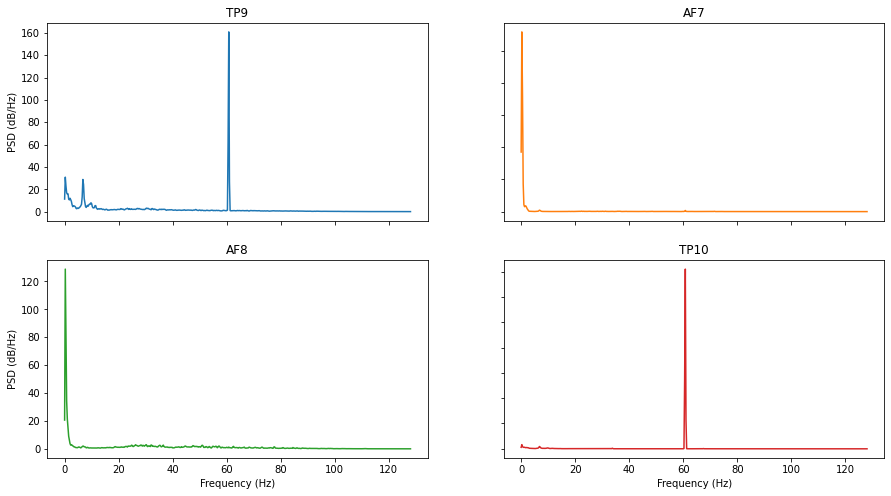

In [4]:
MT11 = zipExtract(M[0],localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
MT11 = MT11.reshape(MT11.shape[1],MT11.shape[2])
MT12 = zipExtract(M[1],localDir,destDir,"M12",cfg.fs,cfg.collection_time,cfg.fs_setting)[1]
MT12 = MT12.reshape(MT12.shape[1],MT12.shape[2])
time_s = zipExtract(M[0],localDir,destDir,"M11",cfg.fs,cfg.collection_time,cfg.fs_setting)[2][0]
time_s = time_s.reshape(len(time_s),1)
time_s = time_s[0:int(cfg.collection_time*cfg.fs)]

plots(time_s,MT11,cfg.channels,['blue','orange','green','red'])
psdPlots(MT11,cfg.fs,cfg.channels)
plots(time_s,MT12,cfg.channels,['blue','orange','green','red'])
psdPlots(MT12,cfg.fs,cfg.channels)

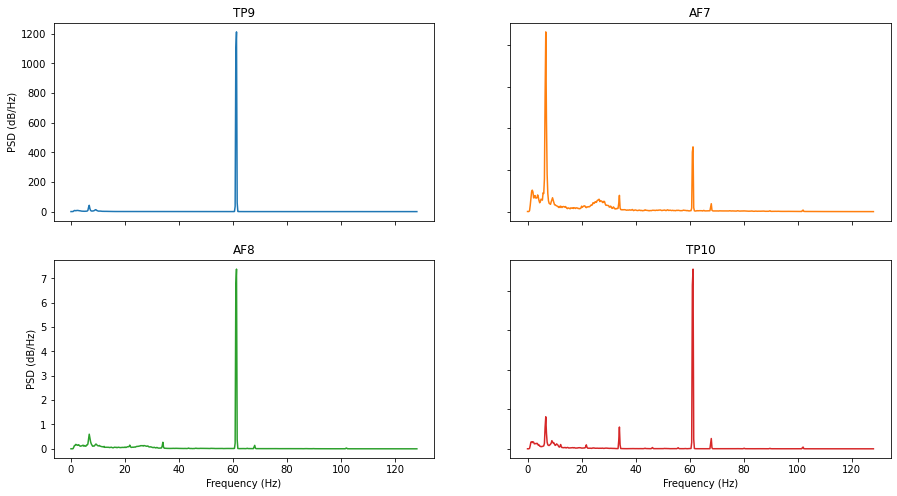

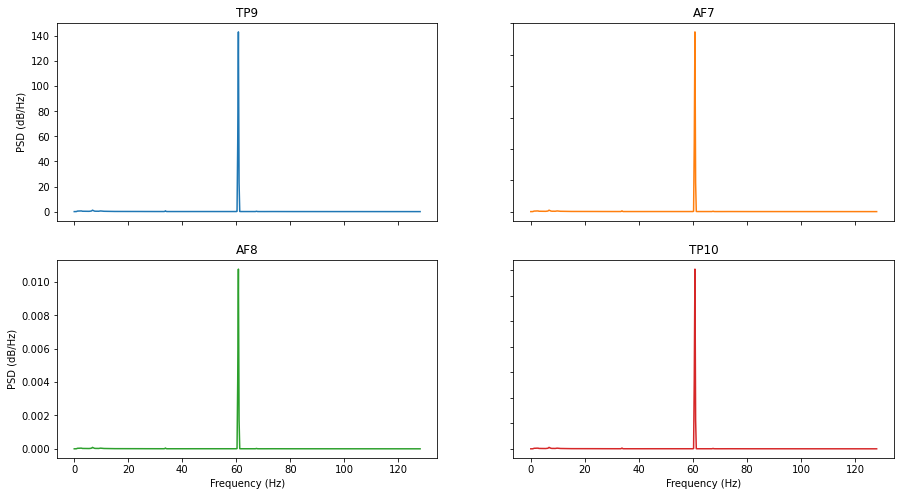

In [5]:
ica_MT11 = ica(MT11,cfg.fs)
ica_MT12 = ica(MT12,cfg.fs)
psdPlots(ica_MT11,cfg.fs,cfg.channels)
psdPlots(ica_MT12,cfg.fs,cfg.channels)

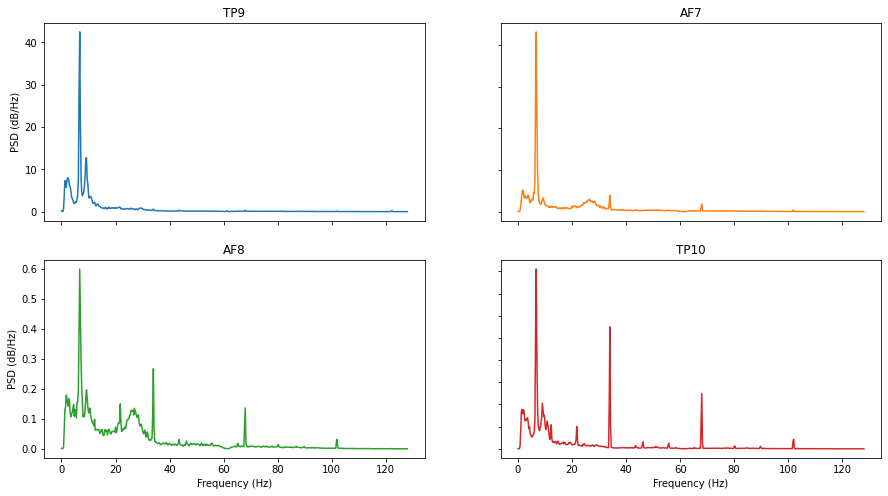

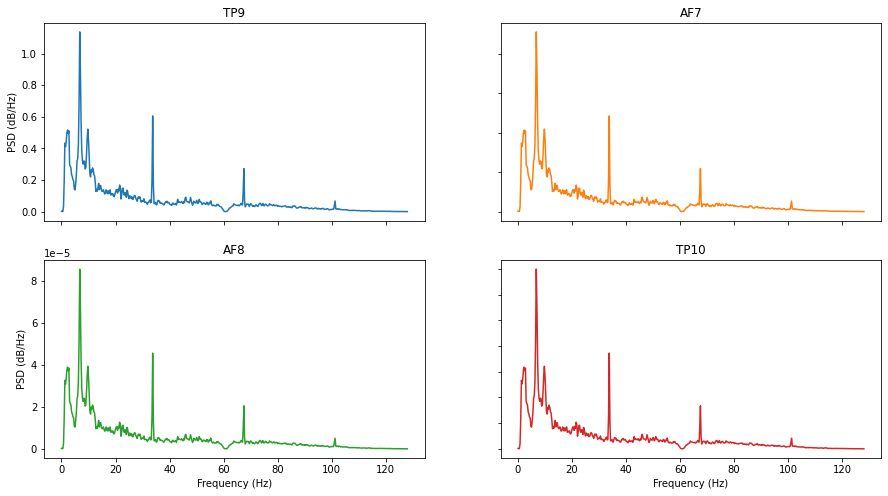

In [6]:
filtering = filters()
noc_MT11 = filtering.notch(ica_MT11,cfg.fs)
noc_MT12 = filtering.notch(ica_MT12,cfg.fs)
psdPlots(noc_MT11,cfg.fs,cfg.channels)
psdPlots(noc_MT12,cfg.fs,cfg.channels)


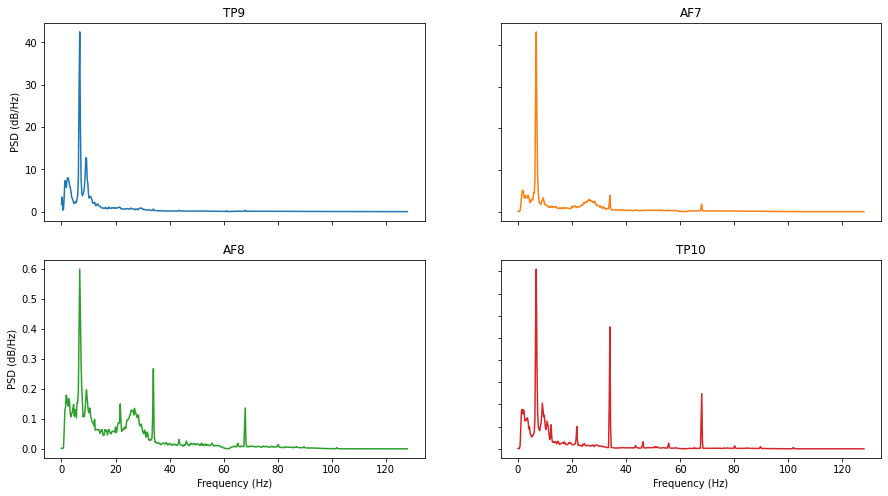

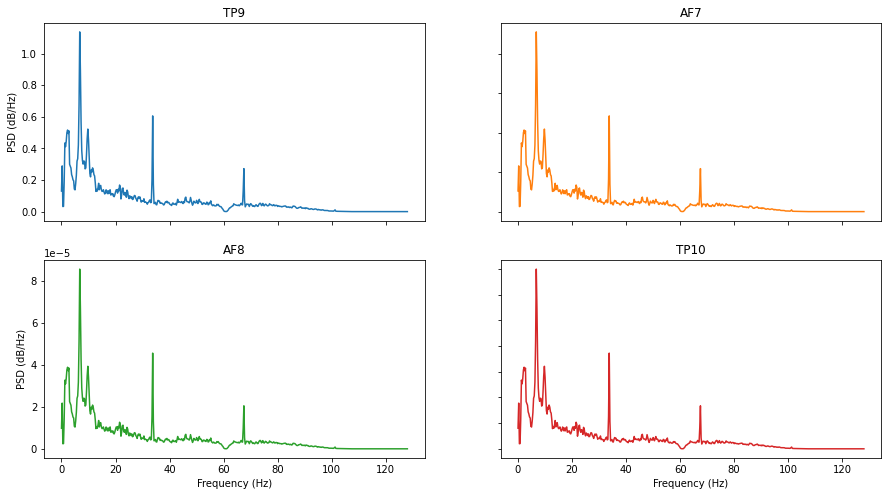

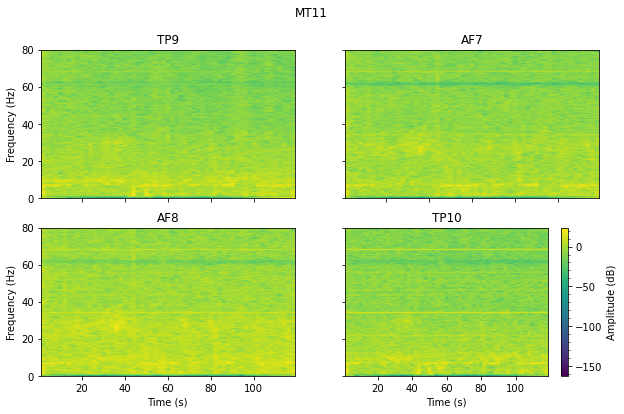

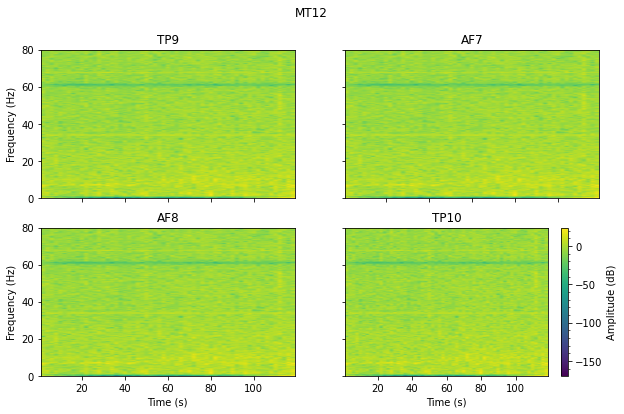

In [7]:
bandpass_MT11 = filtering.butterBandPass(noc_MT11,cfg.lowcut,cfg.highcut,cfg.fs,)
bandpass_MT12 = filtering.butterBandPass(noc_MT12,cfg.lowcut,cfg.highcut,cfg.fs,)
psdPlots(bandpass_MT11,cfg.fs,cfg.channels)
psdPlots(bandpass_MT12,cfg.fs,cfg.channels)
spectogramPlot(bandpass_MT11,cfg.fs,1024,512,(10,6),cfg.channels,'MT11')
spectogramPlot(bandpass_MT12,cfg.fs,1024,512,(10,6),cfg.channels,'MT12')

In [8]:
# compute power spectrum of each window per channel
delta_low = cfg.brainwaves['delta'][0]
delta_high = cfg.brainwaves['delta'][1]
theta_low = cfg.brainwaves['theta'][0]
theta_high = cfg.brainwaves['theta'][1]
alpha_low = cfg.brainwaves['alpha'][0]
alpha_high = cfg.brainwaves['alpha'][1]
beta_low = cfg.brainwaves['beta'][0]
beta_high = cfg.brainwaves['beta'][1]
gamma_low = cfg.brainwaves['gamma'][0]
gamma_high = cfg.brainwaves['gamma'][1]

In [9]:
# compute average band power for timepoint 1

#   delta
delta_M11 = avgBandPower(bandpass_MT11,cfg.fs,delta_low,delta_high)
delta_M12 = avgBandPower(bandpass_MT12,cfg.fs,delta_low,delta_high) 

#   theta
theta_M11 = avgBandPower(bandpass_MT11,cfg.fs,theta_low,theta_high)
theta_M12 = avgBandPower(bandpass_MT12,cfg.fs,theta_low,theta_high)

#   alpha
alpha_M11 = avgBandPower(bandpass_MT11,cfg.fs,alpha_low,alpha_high)
alpha_M12 = avgBandPower(bandpass_MT12,cfg.fs,alpha_low,alpha_high)

#   beta
beta_M11 = avgBandPower(bandpass_MT11,cfg.fs,beta_low,beta_high)
beta_M12 = avgBandPower(bandpass_MT12,cfg.fs,beta_low,beta_high)

#   gamma
gamma_M11 = avgBandPower(bandpass_MT11,cfg.fs,gamma_low,gamma_high)
gamma_M12 = avgBandPower(bandpass_MT12,cfg.fs,gamma_low,gamma_high)

In [10]:
bandPowerPlots(cfg.channels,[delta_M11,delta_M12],['MT11','MT12'],['red','green'],'Delta')
bandPowerPlots(cfg.channels,[theta_M11,theta_M12],['MT11','MT12'],['red','green'],'Theta')
bandPowerPlots(cfg.channels,[alpha_M11,alpha_M12],['MT11','MT12'],['red','green'],'Alpha')
bandPowerPlots(cfg.channels,[beta_M11,beta_M12],['MT11','MT12'],['red','green'],'Beta')
bandPowerPlots(cfg.channels,[gamma_M11,gamma_M12],['MT11','MT12'],['red','green'],'Gamma')

NameError: name 'bandPowerPlots' is not defined